# Filtering, Grouping & Merging with pandas

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* create a folder named data in the same directory as your notebook 
* download Archive.zip into it
* extract the contents of Archive.zip (may take a minute or two)

In [8]:
cast = pd.read_csv("data/cast.csv")

In [18]:
cast

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0


In [22]:
cast.iloc[10:20]

,title,year,name,type,character,n
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
11,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0
12,Mixing Nia,1998,Michael 'babeepower' Viera,actor,Rapper,NaN
13,The Replacements,2000,Steven 'Bear'Boyd,actor,Defensive Tackle - Washington Sentinels,NaN
14,All Out Dysfunktion!,2016,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
15,Gook,2017,Kirlew 'bliss' Vilbon,actor,Bliss,NaN
16,My Song for You,2010,George 'Bootsy' Thomas,actor,Cooley's Customer,16.0
17,My Song for You,2010,George 'Bootsy' Thomas,actor,Celebration Guest,16.0
18,Hustle Beach,2017,Pete 'Boretta' Torres,actor,Tony,NaN
19,Mariano Mison... NBI,1997,Joseph 'Byron' Sese,actor,Putik's Son,31.0


In [24]:
cast.count()

title        3442896
year         3442902
name         3442902
type         3442902
character    3442894
n            2115119
dtype: int64

In [26]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [36]:
cast['n'].count()

2115119

### basic operations
* df.head([optional value])
* df.tail([optional value])
* df['column name'] or df.column_name to subset by columns
* df[['col1, col2, col...']]
* df[column.isnull()]
* df[column.notnull()]
* df[column == some value] 
* df[(df.column > some value) & (df.column < some value)]
* df.sort_values(by=column, ascending=False) # for descending order
* df['column'].str.any_string_method
* df.index --> returns the index of df or subset
* df.sort_index()
* df.plot --> wrapper around matplotlib
* df.groupby --> allows grouping and aggregation, similar to pivot table
* df.set_index --> easily change index on the fly, can be multi-indexed
* unstack --> must be used on multi-index post aggregation
* df.reset_index --> resets index to integer based
* pd.pivot_table --> top level function a df, works as pivot table (try help)

In [54]:
mask = cast.year >= 2015
cast[~mask].sort_values(by='year')

,title,year,name,type,character,n
2389907,Miss Jerry,1894,Blanche Bayliss,actress,Miss Geraldine Holbrook (Miss Jerry),NaN
527543,Miss Jerry,1894,Chauncey Depew,actor,Himself - the Director of the New York Central...,NaN
441626,Miss Jerry,1894,William Courtenay,actor,Mr. Hamilton,NaN
1631286,Soldiers of the Cross,1900,Reg Perry,actor,Lion,NaN
1631136,Soldiers of the Cross,1900,Orrie Perry,actor,Lion,NaN
...,...,...,...,...,...,...
345665,"Bro, What Happened?",2014,Frank Cermak Jr.,actor,Clown,NaN
659136,Il mistero di Dante,2014,Pierluigi Ferrero,actor,Knight,NaN
1715294,Boulevard,2014,Steven Randazzo,actor,Guard Walt,13.0
941399,Lighter People,2014,Brian Houghton,actor,Cyberpunk84,NaN


In [58]:
cast[cast.year == 2017].sort_values(by='title')

,title,year,name,type,character,n
938279,#Captured,2017,Adam Horner,actor,Mason,9.0
2988277,#Captured,2017,Megan Medellin,actress,Jenn,3.0
967240,#Captured,2017,Charlie Ian,actor,Brock,4.0
299098,#Captured,2017,Sam Cain,actor,Killer,8.0
268457,#Captured,2017,Cody Bruno,actor,Tony,5.0
...,...,...,...,...,...,...
3235058,xXx: Return of Xander Cage,2017,Helena-Alexis Seymour,actress,Ainsley's Girl,27.0
993881,xXx: Return of Xander Cage,2017,Nicky Jam,actor,Lazarus,21.0
326085,xXx: Return of Xander Cage,2017,Charles (II) Carroll,actor,Friendly Man,24.0
3215149,xXx: Return of Xander Cage,2017,Jelena (II) Savic,actress,Catwalk Partier,93.0


In [60]:
cast[cast['title'] == "Closet Monster"].count()

title        32
year         32
name         32
type         32
character    32
n            31
dtype: int64

In [76]:
cast[(cast.year>= 2017) & (cast.year < 2020) & (cast.title == "Battle of the Sexes")].sort_values(by='year')

,title,year,name,type,character,n
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2835494,Battle of the Sexes,2017,Christine (II) Kent,actress,Tennis Fan,NaN
2835493,Battle of the Sexes,2017,Christine (II) Kent,actress,Airport,NaN
2795690,Battle of the Sexes,2017,Eli Jane,actress,Dancer,NaN
2791225,Battle of the Sexes,2017,Jahmilla Jackson,actress,Tennis Attendee,NaN
...,...,...,...,...,...,...
1056324,Battle of the Sexes,2017,Marcus (II) Karlsson,actor,Night Club Patron,NaN
1028295,Battle of the Sexes,2017,Richard Allan Jones,actor,Country Club Member,NaN
994854,Battle of the Sexes,2017,Eddie (X) James,actor,Hairdresser,NaN
994279,Battle of the Sexes,2017,Barrett James,actor,Male Journalist,NaN


In [78]:
cast[cast['title'] == "Batman"]

,title,year,name,type,character,n
91508,Batman,1943,Frank Austin,actor,Hotel Clerk,NaN
91971,Batman,1943,William Austin,actor,Alfred Beagle,NaN
109263,Batman,1989,Del Baker,actor,Napier Hood,31.0
114450,Batman,1989,Michael Balfour,actor,Scientist,44.0
143234,Batman,1989,David Baxt,actor,Dr. Thomas Wayne,48.0
...,...,...,...,...,...,...
2765321,Batman,1989,Sharon Holm,actress,Mrs. Wayne,49.0
3098649,Batman,1943,Shirley Patterson,actress,Linda Page,4.0
3185164,Batman,1989,Pam Rose,actress,Party Guest at Wayne Manor,NaN
3186979,Batman,1989,Liza Ross,actress,Tourist Mom,45.0


In [82]:
cast[cast.title.str.contains("Batman", na=False)]

,title,year,name,type,character,n
941,Batman Fights Dracula,1967,Jing Abalos,actor,Batman,1.0
942,Batman Fights Dracula,1967,Jing Abalos,actor,Bruce Wayne,1.0
4140,Batman v Superman: Dawn of Justice,2016,Monib Abhat,actor,Angry Football Player 1,NaN
10819,Batman v Superman: Dawn of Justice,2016,Jay R. Adams,actor,Metropolis Cop,48.0
14147,Batman: The Movie,1966,Robert Adler,actor,Guard,NaN
...,...,...,...,...,...,...
3415896,Batman v Superman: Dawn of Justice,2016,Janellyn Woo,actress,Citizen,NaN
3418933,Batman v Superman: Dawn of Justice,2016,Christina Wren,actress,Major Farris,59.0
3429446,Batman: The Movie,1966,De De Young,actress,Bikini Girl,NaN
3439112,B@ (Batman Parody Film),2016,Brittany Zimmermann,actress,Melissa,7.0


In [84]:
titles = pd.read_csv('data/titles.csv')

In [86]:
titles.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


In [88]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [101]:
titles[titles.title.str.contains('Lord of the Rings', na=False)].sort_values(by="year")

,title,year
154780,The Lord of the Rings,1978
47889,The Lord of the Rings: The Fellowship of the Ring,2001
188481,The Lord of the Rings: The Two Towers,2002
155233,The Lord of the Rings: The Return of the King,2003
182919,The Lord of the Rings Symphony,2003


In [105]:
titles[titles.title.str.contains('Avatar', na = False)].sort_values(by='year')

,title,year
53740,Avatar,1916
209651,Avatar,2009
146258,Avatarachi Goshta,2014
201445,The Last Avatar,2014
34441,Avataran,2016
101240,The Avatar Project,2017
158143,Avatar 2,2020
132033,Avatar 3,2021
136294,Avatar 4,2024
67170,Avatar 5,2025


<Axes: xlabel='year'>

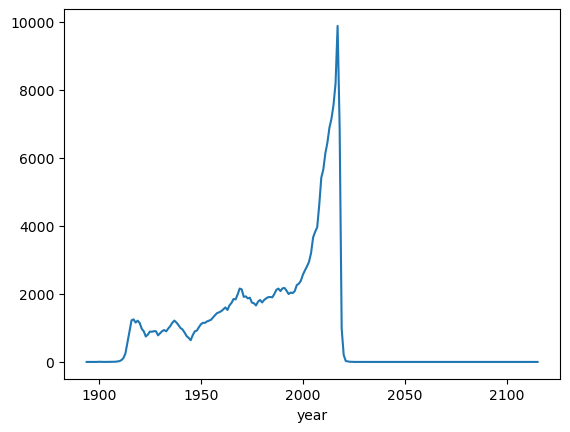

In [117]:
titles.year.value_counts().sort_index().plot()

In [135]:
titles_2017 = titles[titles.year <= 2017].copy()

<Axes: xlabel='year'>

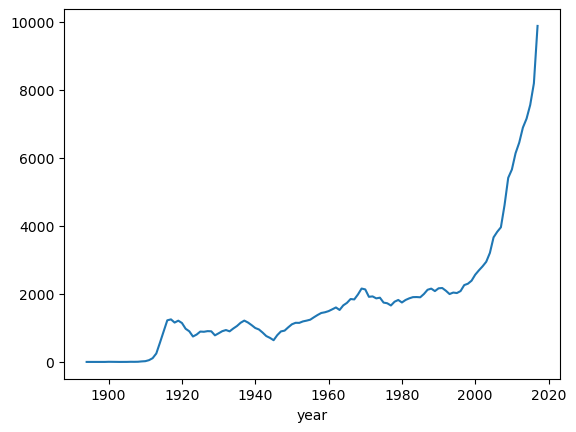

In [137]:
titles_2017['year'].value_counts().sort_index().plot()

In [139]:
titles_2017['decade'] = titles_2017['year'] // 10 * 10

<Axes: xlabel='decade'>

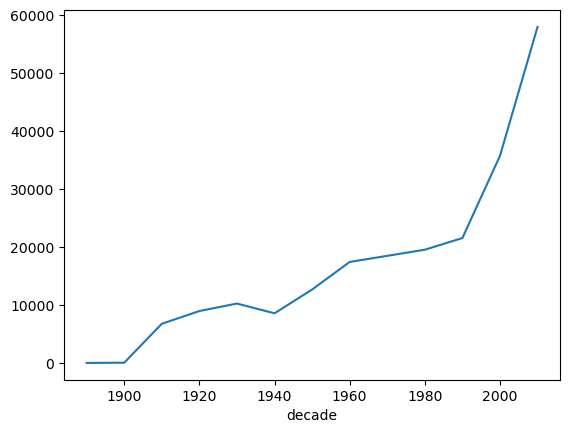

In [145]:
titles_2017['decade'].value_counts().sort_index().plot()

In [153]:
titles_2017.sort_values(by='decade')

,title,year,decade
160829,The Startled Lover,1898,1890
72324,Miss Jerry,1894,1890
60945,Reproduction of the Corbett and Jeffries Fight,1899,1890
139107,Excelsior (II),1909,1900
218349,Soldiers of the Cross,1900,1900
...,...,...,...
136113,The Passion of Paul Ross,2017,2010
23066,Lal Bahadur & Shastri,2014,2010
23067,Se Busca Novio... Para Mi Mujer,2017,2010
136132,Not a Network TV Show,2017,2010


In [157]:
titles[titles.year > 2017].sort_values(by='year')

,title,year
112,Alex Winter,2018
145931,Gold,2018
145926,Paved New World,2018
145882,Stale Ramen,2018
145881,A.K.A. Jet,2018
...,...,...
136109,Despicable Me 4,2024
169195,War in Black,2024
67170,Avatar 5,2025
125751,The Zero Century: Maetel,2026


In [161]:
merged = pd.concat([titles, cast])

<Axes: xlabel='year'>

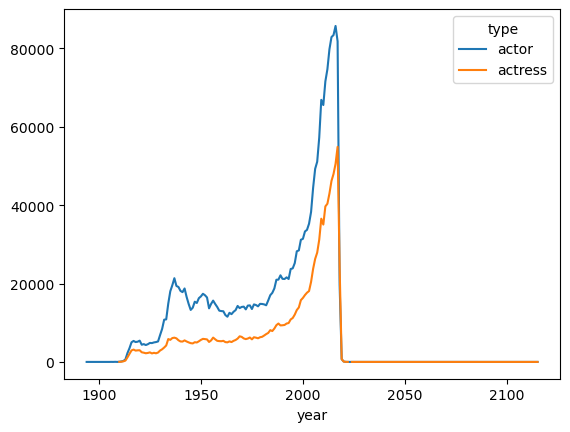

In [175]:
cast.groupby(['year', 'type']).size().unstack().plot()

In [187]:
pd.pivot_table(cast, values='n', index=['year'], aggfunc=['mean', 'std', 'count']).dropna()

,mean,std,count
,n,n,n
year,,,
1906,1.714286,0.755929,7
1907,3.000000,1.581139,5
1908,15.057143,9.155335,35
1910,6.516129,5.315831,31
1911,4.941667,4.207428,120
...,...,...,...
2016,18.909942,24.021643,58229
2017,18.660712,28.085634,46574
